# Names and IDs
 1. Yuval Segal 313354763
 2. Eran Aizikovich 316531201

In [ ]:
import numpy as np
import pandas as pd

y_train = pd.read_csv('/kaggle/input/mirna-cross-species-prediction/y_train.csv')
y_train = y_train.dropna()
y_train = y_train.set_index('id')

### EDA - Exploratory Data Analysis (10 pts):


In [ ]:
# load data
x_train = pd.read_csv('/kaggle/input/mirna-cross-species-prediction/x_train.csv')
x_test = pd.read_csv('/kaggle/input/mirna-cross-species-prediction/x_test.csv')
y_train = pd.read_csv('/kaggle/input/mirna-cross-species-prediction/y_train.csv')
# All data for scale and imputer
all_data = x_train.append(x_test, ignore_index=True).set_index('id')

# Drop rows with no label
y_train = y_train.dropna()
x_train = x_train.loc[x_train['id'].isin(y_train['id'])]
plt_df= y_train.copy()
y_train = y_train.set_index('id')
x_train = x_train.set_index('id')
x_test = x_test.set_index('id')

x_train.head()

Acc_P10_10th  Acc_P10_1th  Acc_P10_2th  Acc_P10_3th  Acc_P10_4th  \
id                                                                     
0       0.009997     0.286680     0.071469     0.030892     0.028100   
1       0.256987     0.263582     0.255437     0.246667     0.247228   
2       0.318176          NaN     0.973395          NaN          NaN   
4            NaN          NaN     0.956451     0.938652     0.929122   
5       0.037082     0.157025     0.140585          NaN     0.045484   

    Acc_P10_5th  Acc_P10_6th  Acc_P10_7th  Acc_P10_8th  Acc_P10_9th  ...  \
id                                                                   ...   
0      0.027835          NaN     0.020861     0.011003     0.010268  ...   
1      0.249358     0.248635     0.249442     0.250728     0.253797  ...   
2      0.337735          NaN     0.316446          NaN     0.316883  ...   
4           NaN          NaN     0.032907     0.016511     0.002570  ...   
5      0.038592     0.038815     0.038783     0.038781     0.038528  ...   

    miRNAPairingCount_Total_target_bulge  miRNAPairingCount_X3p_AU  \
id                                                                   
0                                    0.0                       4.0   
1                                    NaN                       3.0   
2                                    1.0                       0.0   
4                                    NaN                       1.0   
5                                    1.0                       1.0   

    miRNAPairingCount_X3p_GC  miRNAPairingCount_X3p_GU  \
id                                                       
0                        3.0                       1.0   
1                        3.0                       NaN   
2                        0.0                       1.0   
4                        3.0                       1.0   
5                        6.0                       NaN   

    miRNAPairingCount_X3p_bulge_mir_nt  miRNAPairingCount_X3p_bulge_nt  \
id                                                                       
0                                  3.0                             3.0   
1                                  NaN                             NaN   
2                                 10.0                            10.0   
4                                  0.0                             0.0   
5                                  NaN                             2.0   

    miRNAPairingCount_X3p_bulge_target_nt  miRNAPairingCount_X3p_mir_bulge  \
id                                                                           
0                                     0.0                              2.0   
1                                     0.0                              NaN   
2                                     0.0                              NaN   
4                                     NaN                              0.0   
5                                     1.0                              1.0   

    miRNAPairingCount_X3p_mismatch  miRNAPairingCount_X3p_target_bulge  
id                                                                      
0                              NaN                                 0.0  
1                              NaN                                 1.0  
2                              3.0                                 1.0  
4                              NaN                                 1.0  
5                              NaN                                 NaN  

[5 rows x 592 columns]

test size: (23205, 592)
train size: (6363, 592)
all data size: (32260, 592)


<BarContainer object of 5 artists>

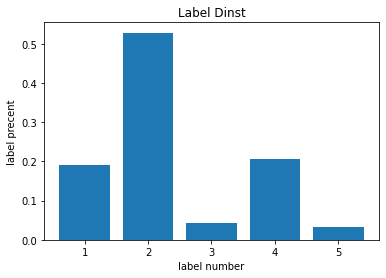

In [ ]:
import matplotlib.pyplot as plt

precent_labeled = (plt_df.groupby(['label'],as_index=False).count()/plt_df.shape[0])['id']
labels = np.array([i for i in range(1, 6)])

precent_labeled.head()
plt.title('Label Dinst')
plt.xlabel('label number')
plt.ylabel('label precent')

print(f"test size: {x_test.shape}")
print(f"train size: {x_train.shape}")
print(f"all data size: {all_data.shape}")

plt.bar(labels,precent_labeled)

In [ ]:
x_train.describe()

Acc_P10_10th  Acc_P10_1th  Acc_P10_2th  Acc_P10_3th  Acc_P10_4th  \
count  4.423000e+03  4424.000000  4430.000000  4461.000000  4459.000000   
mean   1.337864e-01     0.591123     0.477786     0.395757     0.323927   
std    1.985738e-01     0.296847     0.299533     0.293152     0.275173   
min    5.280000e-08     0.001668     0.000084     0.000065     0.000051   
25%    9.275504e-03     0.338483     0.206540     0.138846     0.092890   
50%    4.772201e-02     0.623655     0.448770     0.329014     0.244674   
75%    1.610205e-01     0.872934     0.742115     0.627854     0.498180   
max    9.998509e-01     0.999947     0.999724     0.999908     0.999851   

       Acc_P10_5th   Acc_P10_6th   Acc_P10_7th   Acc_P10_8th   Acc_P10_9th  \
count  4473.000000  4.442000e+03  4.456000e+03  4.477000e+03  4.460000e+03   
mean      0.269670  2.304082e-01  1.964671e-01  1.756541e-01  1.460554e-01   
std       0.260815  2.466843e-01  2.337051e-01  2.257919e-01  2.065462e-01   
min       0.000003  5.920000e-07  5.000000e-09  5.930000e-07  1.690000e-10   
25%       0.064172  4.259784e-02  2.867340e-02  2.155783e-02  1.300104e-02   
50%       0.173358  1.355332e-01  9.837231e-02  7.940770e-02  5.678245e-02   
75%       0.407228  3.414656e-01  2.809285e-01  2.403324e-01  1.844293e-01   
max       0.999812  9.998352e-01  9.998392e-01  9.996446e-01  9.920735e-01   

       ...  miRNAPairingCount_Total_target_bulge  miRNAPairingCount_X3p_AU  \
count  ...                           4516.000000               4413.000000   
mean   ...                              1.191320                  3.727623   
std    ...                              0.994191                  1.776407   
min    ...                              0.000000                  0.000000   
25%    ...                              0.000000                  3.000000   
50%    ...                              1.000000                  4.000000   
75%    ...                              2.000000                  5.000000   
max    ...                              6.000000                 10.000000   

       miRNAPairingCount_X3p_GC  miRNAPairingCount_X3p_GU  \
count               4454.000000               4499.000000   
mean                   4.156264                  1.219382   
std                    1.765454                  1.164014   
min                    0.000000                  0.000000   
25%                    3.000000                  0.000000   
50%                    4.000000                  1.000000   
75%                    5.000000                  2.000000   
max                   10.000000                  7.000000   

       miRNAPairingCount_X3p_bulge_mir_nt  miRNAPairingCount_X3p_bulge_nt  \
count                         4397.000000                     4439.000000   
mean                             1.135547                        3.531426   
std                              1.874911                        4.429238   
min                              0.000000                        0.000000   
25%                              0.000000                        1.000000   
50%                              0.000000                        2.000000   
75%                              2.000000                        4.000000   
max                             15.000000                       37.000000   

       miRNAPairingCount_X3p_bulge_target_nt  miRNAPairingCount_X3p_mir_bulge  \
count                            4442.000000                      4431.000000   
mean                                2.327330                         0.527195   
std                                 4.294183                         0.645959   
min                                 0.000000                         0.000000   
25%                                 0.000000                         0.000000   
50%                                 1.000000                         0.000000   
75%                                 3.000000                         1.000000   
max                              

### Preprocessing (10 pts):
For preprocess stage we did the followa
* Reomve catagorial features
* Standardization for the data this way
* Fill nulls
* try PCA (not good for this dataset)
* correct labels

In [ ]:
from scipy.linalg import dft
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import time
import xgboost

# first remove catagorials features
def remove_catagorial(df):
    
    return df.drop(list(df.select_dtypes(['object']).columns), axis=1,)
x_train, x_test, all_data = remove_catagorial(x_train), remove_catagorial(x_test), remove_catagorial(all_data)

# Standardization of train and test with ALL DATA mean & std
scaler = StandardScaler()
all_data = pd.DataFrame(scaler.fit_transform(all_data), columns = all_data.columns)
x_train = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [ ]:
start = time.time()

imputer = IterativeImputer(
    estimator=xgboost.XGBRegressor(
        verbosity = 0,
        n_estimators=5,
        random_state=1,
    ),
    missing_values=np.nan,
    max_iter=5,
    initial_strategy='mean',
    imputation_order='ascending',
    verbose=2,
    random_state=1, 
    n_nearest_features=15
)

all_data_fill = pd.DataFrame(imputer.fit_transform(all_data),columns = all_data.columns)
x_train = pd.DataFrame(imputer.transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test),columns = x_test.columns)
end = time.time()

print(f'Time to prereprocessing: {(end - start)/60} mins')

[IterativeImputer] Completing matrix with shape (32260, 568)
[IterativeImputer] Ending imputation round 1/5, elapsed time 121.78
[IterativeImputer] Change: 330.62852716445923, scaled tolerance: 0.04030073087837541 
[IterativeImputer] Ending imputation round 2/5, elapsed time 248.17
[IterativeImputer] Change: 96.65945632942021, scaled tolerance: 0.04030073087837541 
[IterativeImputer] Ending imputation round 3/5, elapsed time 375.34
[IterativeImputer] Change: 83.41873799264431, scaled tolerance: 0.04030073087837541 
[IterativeImputer] Ending imputation round 4/5, elapsed time 502.11
[IterativeImputer] Change: 80.8450154075399, scaled tolerance: 0.04030073087837541 
[IterativeImputer] Ending imputation round 5/5, elapsed time 629.17
[IterativeImputer] Change: 90.11513273790479, scaled tolerance: 0.04030073087837541 


/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


[IterativeImputer] Completing matrix with shape (6363, 568)
[IterativeImputer] Ending imputation round 1/5, elapsed time 2.04
[IterativeImputer] Ending imputation round 2/5, elapsed time 4.04
[IterativeImputer] Ending imputation round 3/5, elapsed time 6.07
[IterativeImputer] Ending imputation round 4/5, elapsed time 8.31
[IterativeImputer] Ending imputation round 5/5, elapsed time 10.49
[IterativeImputer] Completing matrix with shape (23205, 568)
[IterativeImputer] Ending imputation round 1/5, elapsed time 3.04
[IterativeImputer] Ending imputation round 2/5, elapsed time 6.14
[IterativeImputer] Ending imputation round 3/5, elapsed time 10.10
[IterativeImputer] Ending imputation round 4/5, elapsed time 13.21
[IterativeImputer] Ending imputation round 5/5, elapsed time 16.26
Time to prereprocessing: 10.987585322062175 mins


In [ ]:
from sklearn.preprocessing import LabelEncoder
# correct labels
le = LabelEncoder()
y_train = le.fit_transform(y_train.values.ravel())

### Model training (10 pts):
Train your ML model.
Explain in detail what model you used to achieve your highest score, what the hyper-parameters were, and why did you choose both the model and these parameters.
Attach at least two learning plot and explain them.
* find best parms using grid search
* fiting model to train data
* learning plots

After alot of Trial and error we diceded that XGBClassifier with the prams founded in the grid search is the fit for us

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

start = time.time()

estimator = XGBClassifier(nthread=-1, n_estimators=1000, seed=42)
param_grid = {'learning_rate': [0.01, 0.05, 0.1],
              'max_depth': [1, 3, 5, 10]
             }

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    n_jobs = 10,
    cv = 2,
    verbose=True
)

#fit model to data
grid_search.fit(x_train, y_train)
#check top performing n_neighbors value
best_prams = grid_search.best_params_
total = time.time() - start

Fitting 2 folds for each of 12 candidates, totalling 24 fits


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print(f'grid sreach time {total//60} min')
print(f'best parmeters {best_prams}')

grid sreach time 142.0 min
best parmeters {'learning_rate': 0.1, 'max_depth': 3}


In [ ]:
%%capture

start = time.time()

xs_train, xs_test, ys_train, ys_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

evalset = [(xs_train, ys_train), (xs_test,ys_test)]

xgb_b1 = XGBClassifier(n_estimators=1000, max_depth=3, learning_rate=0.1, metric='multiclass', eval_metric='mlogloss')
xgb_b1.fit(xs_train, ys_train, eval_set=evalset)

y_pred = xgb_b1.predict(xs_test)
score = accuracy_score(ys_test, y_pred)

total = time.time() - start


In [ ]:
print(f'Time to fitting: {(total)/60} mins')
print(xgb_b1.score(xs_test, ys_test))

Time to fitting: 6.602971732616425 mins
0.7785714285714286


The following learning curve shows us that its not the best fit but not bed one either. We can say we are not overfiting

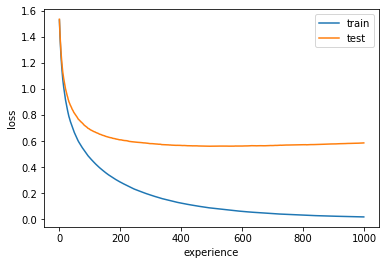

In [ ]:
# retrieve performance metrics
results = xgb_b1.evals_result()
# plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
plt.ylabel('loss')
plt.xlabel('experience')
plt.legend()
# show the plot
plt.show()

At this learning curve we can see the improvemet of the accuracy as we go along the Cross Validation.

Time to fitting: -160.21374029715855 mins


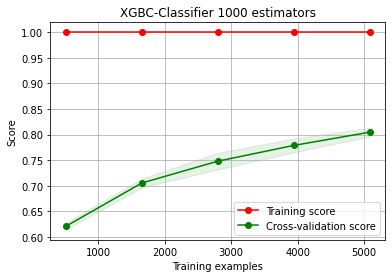

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    
    return plt

start = time.time()

model = XGBClassifier(n_estimators=1000)
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

plot_learning_curve(estimator=model,title='XGBC-Classifier 1000 estimators',X=x_train, y=y_train, n_jobs=-1)

total = time.time() - start
print(f'Time to fitting: {(total)/60} mins')

plt.show()

In [ ]:
print(f'Time to plot curves: {(total)/60} mins')

Time to plot curves: 65.67046332359314 mins


### Metrics for evolutions

Since the data not balanced we say F1-score is better for evolution. 

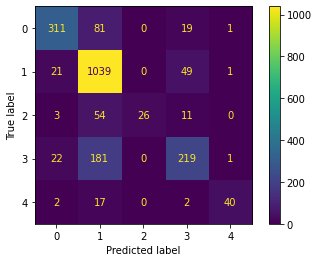

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, f1_score, recall_score 
from sklearn.metrics import accuracy_score, balanced_accuracy_score


y_pred = xgb_b1.predict(xs_test)
y_true = ys_test
scores = {}

scores['balanced_accuracy'] = balanced_accuracy_score(y_true, y_pred)
scores['accuracy'] = accuracy_score(y_true, y_pred)
for avg in ['micro', 'macro', 'weighted']:
    scores[f'{avg}_precision'] = precision_score(y_true, y_pred, average=avg)
    scores[f'{avg}_f1'] = f1_score(y_true, y_pred, average=avg)
    scores[f'{avg}_recall'] = recall_score(y_true, y_pred, average=avg)

cm = confusion_matrix(y_true, y_pred, labels=xgb_b1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_b1.classes_)
disp.plot()
plt.show()

In [ ]:
scores

{'balanced_accuracy': 0.6281908702041719,
 'accuracy': 0.7785714285714286,
 'micro_precision': 0.7785714285714286,
 'micro_f1': 0.7785714285714285,
 'micro_recall': 0.7785714285714286,
 'macro_precision': 0.8567632905002199,
 'macro_f1': 0.6904691521549681,
 'macro_recall': 0.6281908702041719,
 'weighted_precision': 0.7890658162287274,
 'weighted_f1': 0.764578822429311,
 'weighted_recall': 0.7785714285714286}

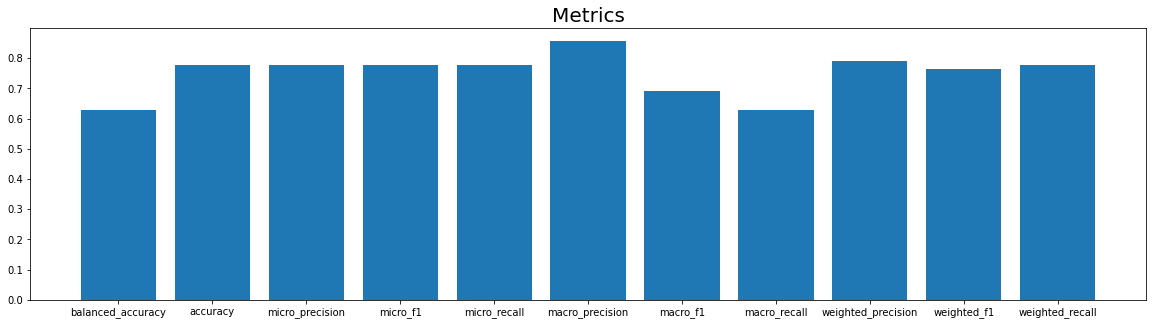

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Metrics", fontsize=20)
plt.bar(range(len(scores)), list(scores.values()), align='center')
plt.xticks(range(len(scores)), list(scores.keys()))
plt.show()

### Shap

In [ ]:
try:
    import shap
except ImportError as e:
    !pip install shap
finally:
    import shap

 Three conclusions following the SHAP outputs.

0.41.0


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


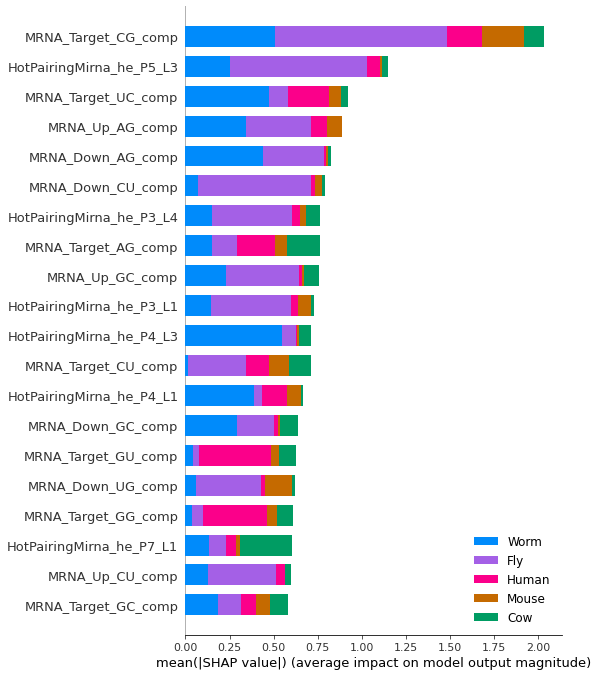

In [ ]:
print(shap.__version__)
shap.initjs()
classes = ['Fly', 'Cow', 'Human', 'Mouse', 'Worm']

X_sampled = xs_train.sample(100, random_state=10)
explainer = shap.TreeExplainer(xgb_b1)
shap_values = explainer.shap_values(X_sampled)

shap.summary_plot(shap_values, X_sampled, class_names=classes ,plot_type="bar")

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1])

In [ ]:
shap.force_plot(explainer.expected_value[2], shap_values[2])